In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


trips = pd.read_csv("data/201812-fordgobike-tripdata.csv")
weather = pd.read_csv('data/weather.csv')

def feature_addition(df):
    '''
    INPUT dataframe
    OUTPUT dataframe with extra features
    '''
    #create a new column that shows the day of week for each trip
    #need to transform panda series to datetime
    #before we can use .dt.dayofweek
    #monday = 0 and sunday = 6

    df.start_time = pd.to_datetime(df.start_time)

    df['day_of_week'] = df.start_time.dt.dayofweek

    df['date'] = df.start_time.dt.date

    #any trip with less than 90 seconds and where
    #start station IS the end station,
    #we make the assumption that its malfunctioned
    df['malfunction'] = (df.duration_sec < 90) & (df.start_station_name == df.end_station_name)
    df['age'] = 2019 - df.member_birth_year

    return df

def num_malfunctions(df):
    '''
    INPUT: Dataframe with a "malfunction" column
    Sum the number of malfunctions up
    OUTPUT: Tuple with 
            first element as number of malfunctions and
            second element as number of non-malfunctions
    '''

    num_malfunctions = df.malfunction.sum()
    num_working = len(df.malfunction) - num_malfunctions

    return (num_malfunctions, num_working)

def frequent_malfunction(df):
    return df.bike_id[df.malfunction == True].value_counts()

def same_station(df):
    return df.bike_id[df.start_station_name == df.end_station_name].value_counts()

def model_city(df, city = 1):
    '''
    Breaks the dataset into 3 cities
    SF = 1
    OAK = 2
    SJ = 3

    INPUT: Dataframe
           Number for city to be modeled
    OUTPUT: returns a portion of the original dataframe
    ''' 
    if city == 1:
        return df[(df.start_station_latitude > 37.697799) & (df.start_station_longitude <-122.330676)]
    elif city == 2:
        return df[(df.start_station_latitude > 37.697799) & (df.start_station_longitude >-122.330676)]
    elif city == 3:
        return df[df.start_station_latitude < 37.697799]

def trips_weather_combined(df1, df2):
    '''
    INPUT df1 is the trips dataframe
          df2 is the weather dataframe
    OUTPUT 1 combined dataframe
    '''

def get_dummies(df):
    
    #start station dummies
    start_dummies = pd.get_dummies(df.start_station_name)
    #end station dummies
    end_dummies = pd.get_dummies(df.end_station_name)
    df = pd.concat([df,start_dummies], axis=1)
    df = pd.concat([df,end_dummies], axis=1)
    
    return df

def merge_dfs(df1, df2, column = 'date'):
    df[column] = pd.to_datetime(df[column])
    df[column] = df[column].dt.date
    combined_df = pd.merge(sf,weather, on='date', how='left')
    return combined_df


In [7]:
df = feature_addition(trips)
sf = model_city(df,1)
weather.columns = map(str.lower, weather.columns)

In [4]:
merge_dfs(sf, weather)

In [5]:
pd.merge(sf,weather, on='date', how='left')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,snow,snow_attributes,snwd,snwd_attributes,tavg,tavg_attributes,tmax,tmax_attributes,tmin,tmin_attributes
0,30550,2018-12-31 19:26:20.775,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
1,2150,2018-12-31 23:59:12.097,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
2,2149,2018-12-31 23:59:11.882,2019-01-01 00:35:01.6850,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
3,2502,2018-12-31 23:46:24.943,2019-01-01 00:28:07.3560,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
4,8202,2018-12-31 22:11:22.506,2019-01-01 00:28:05.1730,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,16.0,Steuart St at Market St,37.794130,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
5,2170,2018-12-31 23:47:19.210,2019-01-01 00:23:30.1300,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
6,3645,2018-12-31 23:22:41.286,2019-01-01 00:23:27.2680,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,8.0,The Embarcadero at Vallejo St,37.799953,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
7,2182,2018-12-31 23:47:02.185,2019-01-01 00:23:24.4950,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
8,4741,2018-12-31 23:03:14.493,2019-01-01 00:22:15.9640,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,9.0,Broadway at Battery St,37.798572,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
9,868,2018-12-31 23:46:34.411,2019-01-01 00:01:02.7040,350.0,8th St at Brannan St,37.771431,-122.405787,23.0,The Embarcadero at Steuart St,37.791464,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"


In [136]:
weather.date = pd.to_datetime(weather.date)
weather.date = weather.date.dt.date

In [137]:
type(weather.date[0])

datetime.date

In [76]:

sfi = sf.set_index(sf.date)
weatheri = weather.set_index(weather.date)

In [82]:
sfi.index.name = 'time'
weatheri.index.name = 'time'


In [84]:
sf.join(weather, )

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,date,malfunction,age
3,30550,2018-12-31 19:26:20.775,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,-122.403452,5422,Subscriber,1986.0,Male,Yes,0,2018-12-31,False,33.0
4,2150,2018-12-31 23:59:12.097,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,4820,Customer,NaN,NaN,No,0,2018-12-31,False,NaN
5,2149,2018-12-31 23:59:11.882,2019-01-01 00:35:01.6850,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,5549,Subscriber,1982.0,Male,Yes,0,2018-12-31,False,37.0
6,2502,2018-12-31 23:46:24.943,2019-01-01 00:28:07.3560,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,4706,Customer,1973.0,Male,No,0,2018-12-31,False,46.0
7,8202,2018-12-31 22:11:22.506,2019-01-01 00:28:05.1730,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,16.0,Steuart St at Market St,37.794130,-122.394430,5518,Customer,1995.0,Male,No,0,2018-12-31,False,24.0


In [85]:
weather.head(5)

,station,name,latitude,longitude,elevation,date,prcp,prcp_attributes,snow,snow_attributes,snwd,snwd_attributes,tavg,tavg_attributes,tmax,tmax_attributes,tmin,tmin_attributes
0,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-01,0.05,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,52,",,W",45,",,W"
1,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-02,0.10,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,51,",,W",43,",,W"
2,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-03,0.40,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,58,",,W",47,",,W"
3,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-04,0.89,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,58,",,W",46,",,W"
4,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-05,0.01,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,50,",,W",42,",,W"


In [57]:
concat_index = pd.concat([sfi, weatheri], axis=1, join_axes=[sfi.index])


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,snow,snow_attributes,snwd,snwd_attributes,tavg,tavg_attributes,tmax,tmax_attributes,tmin,tmin_attributes
date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,30550,2018-12-31 19:26:20.775,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,2150,2018-12-31 23:59:12.097,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,2149,2018-12-31 23:59:11.882,2019-01-01 00:35:01.6850,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,2502,2018-12-31 23:46:24.943,2019-01-01 00:28:07.3560,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,8202,2018-12-31 22:11:22.506,2019-01-01 00:28:05.1730,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,16.0,Steuart St at Market St,37.794130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,2170,2018-12-31 23:47:19.210,2019-01-01 00:23:30.1300,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,3645,2018-12-31 23:22:41.286,2019-01-01 00:23:27.2680,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,8.0,The Embarcadero at Vallejo St,37.799953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,2182,2018-12-31 23:47:02.185,2019-01-01 00:23:24.4950,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,4741,2018-12-31 23:03:14.493,2019-01-01 00:22:15.9640,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,9.0,Broadway at Battery St,37.798572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
type(weather.date.values[0])

str

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,snow,snow_attributes,snwd,snwd_attributes,tavg,tavg_attributes,tmax,tmax_attributes,tmin,tmin_attributes
0,30550,2018-12-31 19:26:20.775,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
1,2150,2018-12-31 23:59:12.097,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
2,2149,2018-12-31 23:59:11.882,2019-01-01 00:35:01.6850,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
3,2502,2018-12-31 23:46:24.943,2019-01-01 00:28:07.3560,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
4,8202,2018-12-31 22:11:22.506,2019-01-01 00:28:05.1730,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,16.0,Steuart St at Market St,37.794130,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
5,2170,2018-12-31 23:47:19.210,2019-01-01 00:23:30.1300,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
6,3645,2018-12-31 23:22:41.286,2019-01-01 00:23:27.2680,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,8.0,The Embarcadero at Vallejo St,37.799953,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
7,2182,2018-12-31 23:47:02.185,2019-01-01 00:23:24.4950,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
8,4741,2018-12-31 23:03:14.493,2019-01-01 00:22:15.9640,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,9.0,Broadway at Battery St,37.798572,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"
9,868,2018-12-31 23:46:34.411,2019-01-01 00:01:02.7040,350.0,8th St at Brannan St,37.771431,-122.405787,23.0,The Embarcadero at Steuart St,37.791464,...,0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",47,",,W"


(1888.0, 2000.0)

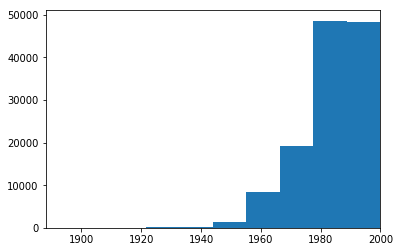

In [438]:

plt.hist(df.member_birth_year[df.member_birth_year.notna()])
plt.xlim(df.member_birth_year.min(), df.member_birth_year.max())

In [439]:
date = sf.start_time.dt.date
sf = sf.set_index(sf.start_time.dt.date)

In [294]:
date= weather.DATE
weather = weather.set_index(weather.DATE)

AttributeError: 'map' object has no attribute 'columns'

In [285]:
df = pd.concat([sf, weather], axis = 1, sort=False)

ValueError: Shape of passed values is (97525, 40), indices imply (823, 40)

In [22]:

trips['malfunction'] = (trips.duration_sec < 90) & (trips.start_station_name == trips.end_station_name)


In [23]:
trips.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,trip_date,malfunction
0,68529,2018-12-31 20:03:11.735,2019-01-01 15:05:21.5580,217.0,27th St at MLK Jr Way,37.817015,-122.271761,217.0,27th St at MLK Jr Way,37.817015,-122.271761,3305,Customer,NaN,NaN,No,0,2018-12-31,False
1,63587,2018-12-31 19:00:32.121,2019-01-01 12:40:19.3660,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4281,Customer,1995.0,Male,No,0,2018-12-31,False
2,64169,2018-12-31 15:09:01.082,2019-01-01 08:58:30.0910,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4267,Customer,1988.0,Male,No,0,2018-12-31,False
3,30550,2018-12-31 19:26:20.775,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,-122.403452,5422,Subscriber,1986.0,Male,Yes,0,2018-12-31,False
4,2150,2018-12-31 23:59:12.097,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,4820,Customer,NaN,NaN,No,0,2018-12-31,False


In [16]:
plt.plot(df.day_of_week)

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12         True
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27         True
28        False
29        False
          ...  
131333    False
131334    False
131335    False
131336    False
131337    False
131338    False
131339    False
131340    False
131341    False
131342    False
131343    False
131344    False
131345    False
131346    False
131347    False
131348    False
131349    False
131350    False
131351    False
131352    False
131353    False
131354    False
131355    False
131356    False
131357    False
131358    False
131359    False
131360    False
131361    False
131362    False
Length: 131363, dtype: b

In [26]:
weather.tail(5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
787,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2019-02-28,0.00,",,W,2400",0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",49,",,W"
788,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2019-03-01,0.01,",,W,2400",0.0,",,W",0.0,",,W",NaN,NaN,57,",,W",47,",,W"
789,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2019-03-02,0.81,",,W,2400",0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",50,",,W"
790,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2019-03-03,0.07,",,W,2400",0.0,",,W",0.0,",,W",NaN,NaN,57,",,W",50,",,W"
791,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2019-03-04,0.11,",,W,2400",0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",49,",,W"


In [295]:
sf.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_date,quarter,day_of_week,hour,malfunction,age
start_time,,,,,,,,,,,,,,,,,,,,,
2018-12-31,30550,2018-12-31 19:26:20.775,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,...,Subscriber,1986.0,Male,Yes,2018-12-31,4,0,19,False,33.0
2018-12-31,2150,2018-12-31 23:59:12.097,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,...,Customer,NaN,NaN,No,2018-12-31,4,0,23,False,NaN
2018-12-31,2149,2018-12-31 23:59:11.882,2019-01-01 00:35:01.6850,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,...,Subscriber,1982.0,Male,Yes,2018-12-31,4,0,23,False,37.0
2018-12-31,2502,2018-12-31 23:46:24.943,2019-01-01 00:28:07.3560,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,Customer,1973.0,Male,No,2018-12-31,4,0,23,False,46.0
2018-12-31,8202,2018-12-31 22:11:22.506,2019-01-01 00:28:05.1730,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,16.0,Steuart St at Market St,37.794130,...,Customer,1995.0,Male,No,2018-12-31,4,0,22,False,24.0


In [296]:
weather.tail(5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,
2019-02-28,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2019-02-28,0.00,",,W,2400",0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",49,",,W"
2019-03-01,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2019-03-01,0.01,",,W,2400",0.0,",,W",0.0,",,W",NaN,NaN,57,",,W",47,",,W"
2019-03-02,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2019-03-02,0.81,",,W,2400",0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",50,",,W"
2019-03-03,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2019-03-03,0.07,",,W,2400",0.0,",,W",0.0,",,W",NaN,NaN,57,",,W",50,",,W"
2019-03-04,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2019-03-04,0.11,",,W,2400",0.0,",,W",0.0,",,W",NaN,NaN,56,",,W",49,",,W"


In [338]:
sf['date'] = sf.start_time.dt.date

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [299]:
sf['temp'] = weather.TMAX[weather.DATE == sf.date]

ValueError: Can only compare identically-labeled Series objects

In [311]:
weather.DATE == sf.date

ValueError: Can only compare identically-labeled Series objects

In [301]:
df1 = pd.DataFrame([[1, 2], [3, 4]])

In [302]:
df2 = pd.DataFrame([[3, 4], [1, 2]], index=[1, 0])

In [312]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,
2017-01-01,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-01,0.05,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,52,",,W",45,",,W"
2017-01-02,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-02,0.10,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,51,",,W",43,",,W"
2017-01-03,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-03,0.40,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,58,",,W",47,",,W"
2017-01-04,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-04,0.89,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,58,",,W",46,",,W"
2017-01-05,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-05,0.01,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,50,",,W",42,",,W"
2017-01-06,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-06,0.00,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,50,",,W",39,",,W"
2017-01-07,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-07,0.82,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,60,",,W",44,",,W"
2017-01-08,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-08,1.46,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,63,",,W",55,",,W"
2017-01-09,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-09,0.17,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,59,",,W",53,",,W"


In [412]:
weather.head(2)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-01,0.05,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,52,",,W",45,",,W"
1,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,2017-01-02,0.10,",,W,2400",NaN,NaN,NaN,NaN,NaN,NaN,51,",,W",43,",,W"


In [413]:
sf.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,Valencia St at 24th St,Valencia St at Cesar Chavez St,Valencia St at Clinton Park,Victoria Manalo Draves Park,Washington St at Kearny St,Webster St at Grove St,Webster St at O'Farrell St,Williams Ave at 3rd St,Williams Ave at Apollo St,Yerba Buena Center for the Arts (Howard St at 3rd St)
3,30550,2018-12-31 19:26:20.775,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,...,0,0,0,0,0,0,0,0,0,0
4,2150,2018-12-31 23:59:12.097,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,...,0,0,0,0,0,0,0,0,0,0
